In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [3]:
netflix = pd.read_csv('netflix_titles_nov_2019.csv')

In [5]:
netflix.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie


## Printing out details of the dataset

In [8]:
netflix['description'][0]

'Brought together by meaningful meals in the past and present, a doctor and a chef are reacquainted when they begin working at a hospice ward.'

In [9]:
netflix.shape

(5837, 12)

In [12]:
netflix.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

### checking for null values

In [13]:
netflix.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

### checking unique values

In [15]:
netflix.nunique()

show_id         5837
title           5780
director        3108
cast            5087
country          527
date_added      1092
release_year      71
rating            14
duration         194
listed_in        449
description     5829
type               2
dtype: int64

In [17]:
netflix.duplicated().sum()

0

### making a copy of dataset

In [18]:
df = netflix.copy()

In [19]:
df.shape

(5837, 12)

### Dropping the null values

In [20]:
df = df.dropna()

In [21]:
df.shape

(3447, 12)

In [23]:
df.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie


In [24]:
df.isnull().sum()

show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64

### COnverting to Date time format

In [26]:
df["date_added"] = pd.to_datetime(df['date_added'])

In [27]:
df["date_added"]

2      2019-11-30
3      2019-11-29
5      2019-11-29
6      2019-11-29
7      2019-11-29
          ...    
5831   2011-05-17
5832   2010-11-01
5833   2009-11-18
5834   2009-05-05
5836   2008-01-01
Name: date_added, Length: 3447, dtype: datetime64[ns]

In [29]:
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

In [30]:
df.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,day_added,year_added,month_added
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,30,2019,11
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,29,2019,11


## Data Vizualization

### Type: Movies or TV Shows

Text(0.5, 1.0, 'Type')

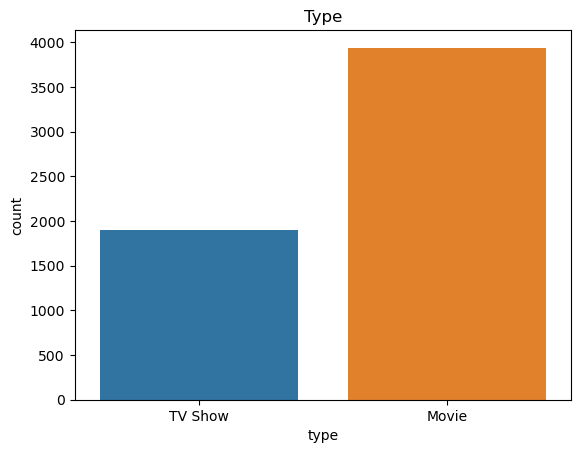

In [39]:
sns.countplot(x=netflix['type'])
fig = plt.gcf
plt.title('Type')

### Ratings of shows and movies

Text(0.5, 1.0, 'Rating')

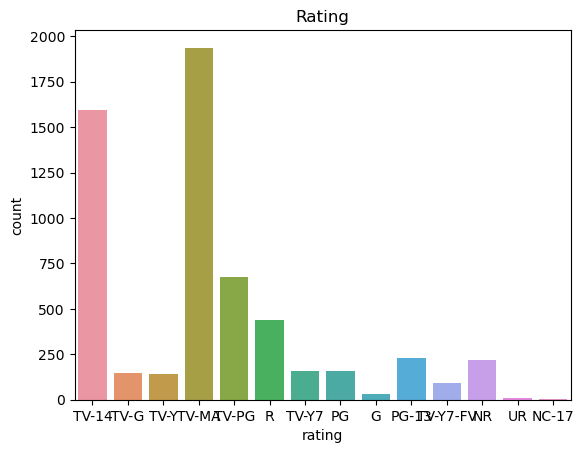

In [43]:
sns.countplot(x=netflix['rating'])
fig = plt.gcf()
plt.title('Rating')

### Relation between Type and ratings

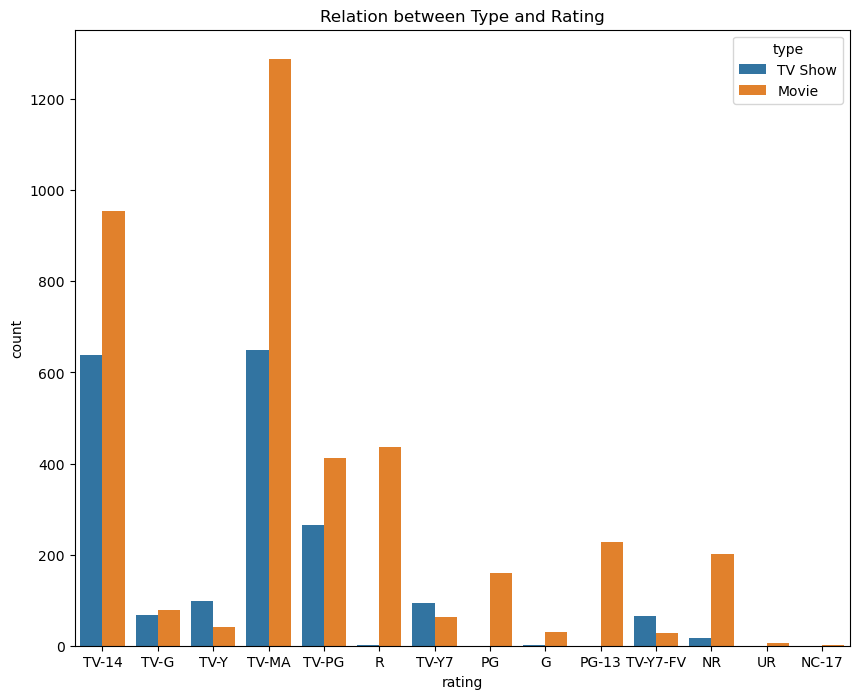

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

### Pie-Chart for the Type: Movie and TV shows

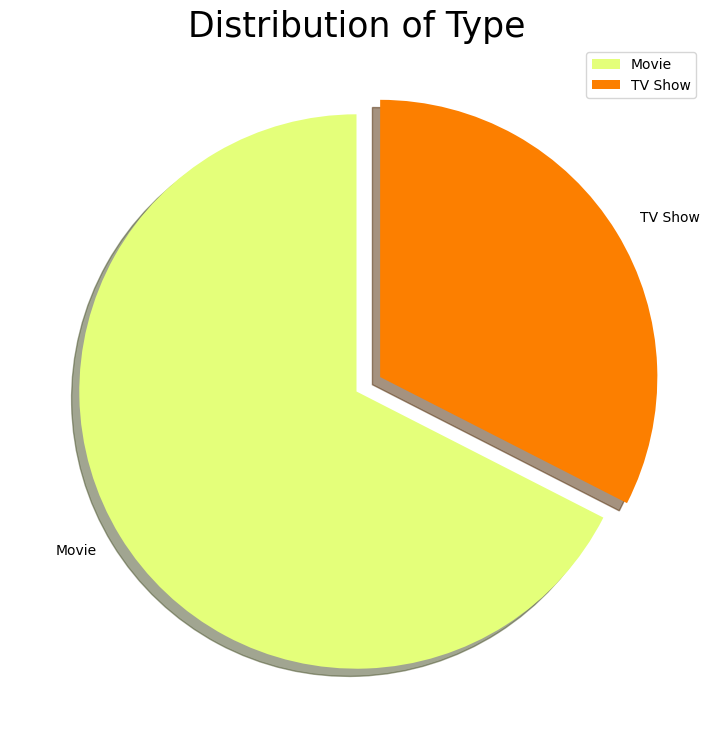

In [45]:
labels = ['Movie','TV Show']
size = netflix['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,2))
explode = [0,0.1]
plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size,labels=labels,colors=colors,explode=explode, shadow=True, startangle=90)
plt.title('Distribution of Type', fontsize=25)
plt.legend()
plt.show()

### Pie-Chart for Rating

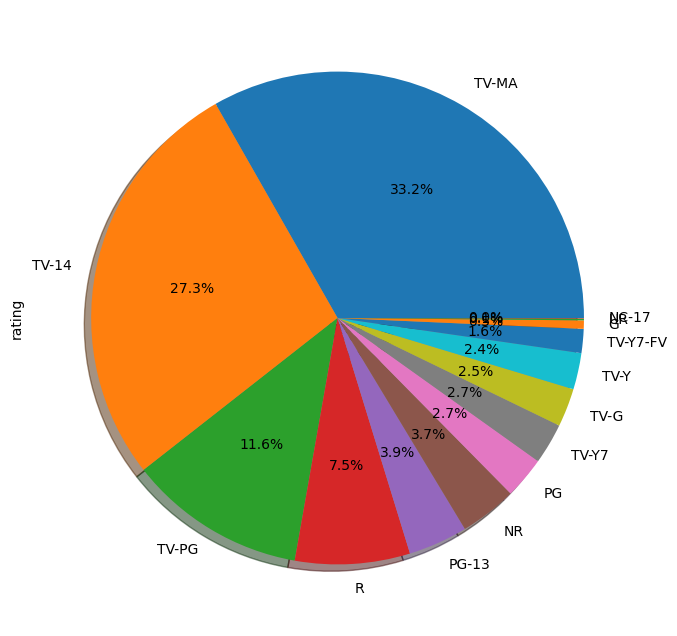

In [48]:
netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

### Wordcloud

In [63]:
from wordcloud import WordCloud

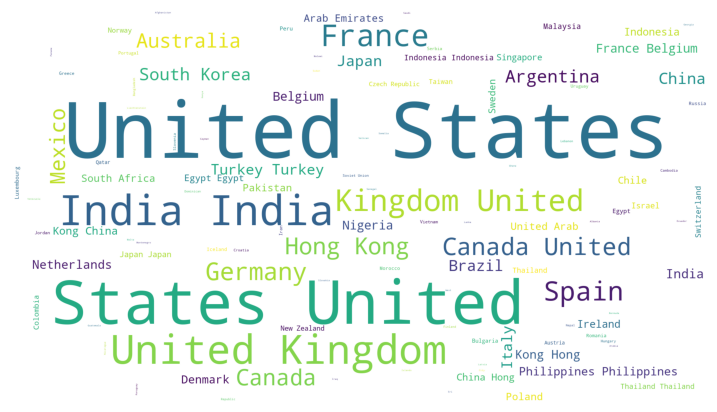

In [67]:
#plt.subplots(figsize(25,15))
wordcloud = WordCloud(
background_color='white',
    width=1920,
    height=1080
).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()